<a href="https://colab.research.google.com/github/Mr-Vicky-06/Infosys_spring_intern/blob/main/Milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ShipmentSure: Predicting On-Time Delivery Using Supplier Data


# Loading the Dataset

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prachi13/customer-analytics")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-analytics


# Libaray for data analysis and visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the Dataset**

In [6]:
df = pd.read_csv('/kaggle/input/customer-analytics/Train.csv')


# Visulizating the first and last 10 data in the dataset

In [7]:
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [8]:
df.tail(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10989,10990,B,Ship,5,1,218,5,medium,F,9,1603,0
10990,10991,C,Ship,5,4,219,6,low,M,3,1098,0
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,1
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


# Information of the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [10]:
df.shape

(10999, 12)

# Attributes of the dataset

In [11]:
df.columns.to_list()

['ID',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

# Description of the dataset
* Count    
* Mean
* Std
* min
* 25%, 50%, 75%
* max


In [12]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# groupby in Warehouse_block

In [13]:
df.groupby('Warehouse_block').sum()

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,,,,,,,,,,,
A,10079667,FlightFlightFlightShipShipShipShipShipShipShip...,7402,5421,382671,6558,lowlowlowmediumhighlowlowlowlowlowmediummedium...,MFMFFFFMMFMFFFMFMMMMMMFMMMMMFMFFFMMMMFFFMFFFFF...,24237,6627118,1075
B,10081500,FlightFlightFlightShipShipShipShipShipShipShip...,7369,5463,388888,6553,mediummediumlowmediummediummediumlowlowlowmedi...,MFFFMMFFMFMMFMFFMMFFFMFMFMFFFMFFFFMFMFFMMFFFMF...,24172,6664240,1104
C,10083333,FlightFlightFlightShipShipShipShipShipShipShip...,7451,5488,387114,6516,mediummediummediumlowlowmediumlowmediumlowhigh...,FMFMMFMFFMMMFFMFMMMFMFFMMFMFMFMMMMMFMMMFFFMFFM...,24562,6674560,1094
D,10087000,FlightFlightFlightShipShipShipShipShipShipShip...,7434,5535,386805,6606,lowlowmediumhighmediummediumhighmediummediumhi...,FFFMFFFMMMFFFMFFMMFMFMMMFFMFFFFFFFMFMMMFMFMFMF...,24014,6655305,1096
F,20163000,FlightFlightFlightFlightFlightShipShipShipShip...,14939,10986,766477,13007,lowmediumlowmediumhighmediummediumhighlowlowlo...,MFFFMMMMMFFFFMMMFMMFMMFFFFFFMFFMFMMMMMMMFMFMFM...,50107,13349327,2194


In [14]:
df.groupby('Warehouse_block').count()

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,,,,,,,,,,,
A,1833,1833,1833,1833,1833,1833,1833,1833,1833,1833,1833
B,1833,1833,1833,1833,1833,1833,1833,1833,1833,1833,1833
C,1833,1833,1833,1833,1833,1833,1833,1833,1833,1833,1833
D,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834
F,3666,3666,3666,3666,3666,3666,3666,3666,3666,3666,3666


In [15]:
df.groupby('Warehouse_block').size()

,0
Warehouse_block,
A,1833
B,1833
C,1833
D,1834
F,3666


In [16]:
df.groupby("Product_importance").count()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Product_importance,,,,,,,,,,,
high,948,948,948,948,948,948,948,948,948,948,948
low,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297,5297
medium,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754


In [17]:
df.groupby('Mode_of_Shipment').count()

,ID,Warehouse_block,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Mode_of_Shipment,,,,,,,,,,,
Flight,1777,1777,1777,1777,1777,1777,1777,1777,1777,1777,1777
Road,1760,1760,1760,1760,1760,1760,1760,1760,1760,1760,1760
Ship,7462,7462,7462,7462,7462,7462,7462,7462,7462,7462,7462


# From this we can able to find the mode of shipment was high in ship

In [19]:
df.groupby('Mode_of_Shipment').size()

,0
Mode_of_Shipment,
Flight,1777
Road,1760
Ship,7462


# Query based analysis

**The list of details which are belonged to based "A" which have high product importance and reached on time**

In [20]:
df[
    (df["Product_importance"] == "high") &
    (df["Reached.on.Time_Y.N"] == 1) &
    (df["Warehouse_block"] == "A")
]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
26,27,A,Ship,4,1,172,3,high,F,24,1066,1
116,117,A,Road,4,1,150,4,high,M,60,1024,1
140,141,A,Flight,4,4,264,3,high,M,59,2020,1
158,159,A,Ship,5,5,205,2,high,M,65,3671,1
176,177,A,Ship,4,5,192,3,high,M,20,3872,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10322,10323,A,Ship,2,1,96,2,high,F,9,4449,1
10400,10401,A,Road,2,1,235,3,high,M,8,4522,1
10898,10899,A,Ship,4,1,222,2,high,M,3,5665,1
10910,10911,A,Ship,5,5,264,8,high,F,10,5759,1


**The list of detials which belongs to block "A" and shiped through Road and have product importance High**

In [21]:
df[(df["Mode_of_Shipment"] == "Road")&(df["Product_importance"] == "high")&(df["Warehouse_block"]=="A")]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
116,117,A,Road,4,1,150,4,high,M,60,1024,1
530,531,A,Road,3,2,237,2,high,M,26,3103,1
536,537,A,Road,2,3,154,4,high,F,17,1897,1
1070,1071,A,Road,3,4,250,2,high,M,61,3207,1
1622,1623,A,Road,3,1,180,3,high,F,21,1047,1
1634,1635,A,Road,6,3,241,6,high,F,8,3878,1
1754,1755,A,Road,6,5,260,4,high,M,10,2756,1
2048,2049,A,Road,3,2,185,2,high,F,49,3864,1
2180,2181,A,Road,4,1,242,3,high,M,47,3489,1
2312,2313,A,Road,4,4,184,3,high,F,27,3967,1


**The details about the productes count based on the importance of the product**

In [22]:
df.groupby('Product_importance').size()

,0
Product_importance,
high,948
low,5297
medium,4754


**To see the shipment details baseed on the mode of shipment and product importnce to find the average cost of the product and average weight of the product**

In [28]:
summary = df.groupby(["Mode_of_Shipment", "Product_importance"]).agg({
    "Weight_in_gms": ["mean", "max", "min"],
    "Cost_of_the_Product": ["mean", "max", "min"]
}).reset_index()

print(summary)

  Mode_of_Shipment Product_importance Weight_in_gms              \
                                               mean   max   min   
0           Flight               high   4069.871166  5997  1029   
1           Flight                low   3536.021480  5987  1009   
2           Flight             medium   3637.667526  5983  1001   
3             Road               high   3974.487342  5991  1024   
4             Road                low   3498.372229  6000  1005   
5             Road             medium   3754.543624  6614  1002   
6             Ship               high   3996.658692  6000  1007   
7             Ship                low   3488.314270  5999  1001   
8             Ship             medium   3720.112280  7846  1003   

  Cost_of_the_Product            
                 mean  max  min  
0          202.564417  289   99  
1          210.875895  310   97  
2          209.028351  310   96  
3          203.050633  291  105  
4          210.421237  310   97  
5          212.112752  3

**To see the detials of the product with minimum and maximum cost of the product**

In [33]:
df.loc[df["Cost_of_the_Product"].idxmin()]

,431
ID,432
Warehouse_block,F
Mode_of_Shipment,Ship
Customer_care_calls,4
Customer_rating,2
Cost_of_the_Product,96
Prior_purchases,3
Product_importance,low
Gender,M
Discount_offered,22


In [34]:

df.loc[df["Cost_of_the_Product"].idxmax()]

,4551
ID,4552
Warehouse_block,B
Mode_of_Shipment,Ship
Customer_care_calls,6
Customer_rating,2
Cost_of_the_Product,310
Prior_purchases,4
Product_importance,medium
Gender,F
Discount_offered,5


**The detials of the shipment with the high importance and mode of shipment ship with some other conditions

In [35]:
df[(df["Mode_of_Shipment"] == "Ship")&(df["Product_importance"] == "high")&(df["Warehouse_block"]=="A")&(df["Customer_rating"]==5)&(df["Customer_care_calls"]==5)]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
158,159,A,Ship,5,5,205,2,high,M,65,3671,1
4970,4971,A,Ship,5,5,233,3,high,M,5,5330,0
5234,5235,A,Ship,5,5,271,4,high,M,10,4305,1
5846,5847,A,Ship,5,5,193,5,high,F,4,5087,1
9230,9231,A,Ship,5,5,253,2,high,F,3,4851,0
10910,10911,A,Ship,5,5,264,8,high,F,10,5759,1


**Detials if the shiment with low and high discount**

In [43]:
# For Low discount (min discount)
max_low = df.loc[df["Discount_offered"].idxmin()]

# For High discount (max discount)
max_high = df.loc[df["Discount_offered"].idxmax()]

print(max_low)

print(max_high)

ID                         13
Warehouse_block             D
Mode_of_Shipment       Flight
Customer_care_calls         3
Customer_rating             5
Cost_of_the_Product       198
Prior_purchases             3
Product_importance     medium
Gender                      F
Discount_offered            1
Weight_in_gms            3667
Reached.on.Time_Y.N         1
Name: 12, dtype: object
ID                      112
Warehouse_block           B
Mode_of_Shipment       Road
Customer_care_calls       4
Customer_rating           2
Cost_of_the_Product     239
Prior_purchases           3
Product_importance      low
Gender                    F
Discount_offered         65
Weight_in_gms          3679
Reached.on.Time_Y.N       1
Name: 111, dtype: object


# EDA(Exploratory Data Analysis)
It is the process of analyzing datasets to summarize their main characteristics, often using visual methods, before applying machine learning or statistical models.


* Understand the data – structure, format, and meaning of attributes.

* Identify patterns & relationships – correlations, distributions, trends.

* Detect anomalies/outliers – unusual data points.

* Test assumptions – check normality, variance, etc.

* Prepare for modeling – feature selection, transformation, handling missing values.

# To find the Correlation between the attributes with num datatype

In [45]:
df.select_dtypes(include=np.number).corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


Correlation is a statistical measure that shows the strength and direction of the linear relationship between two variables. Its value ranges from -1 to +1, where +1 indicates a perfect positive relationship, -1 indicates a perfect negative relationship, and 0 means no linear relationship. In EDA, correlation is widely used because it helps to identify patterns, detect multicollinearity, and select important features for modeling. Since it is standardized, correlation is easier to interpret than covariance and provides clear insights into how variables are related.

In [46]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# 1. Distribution of Numeric Features

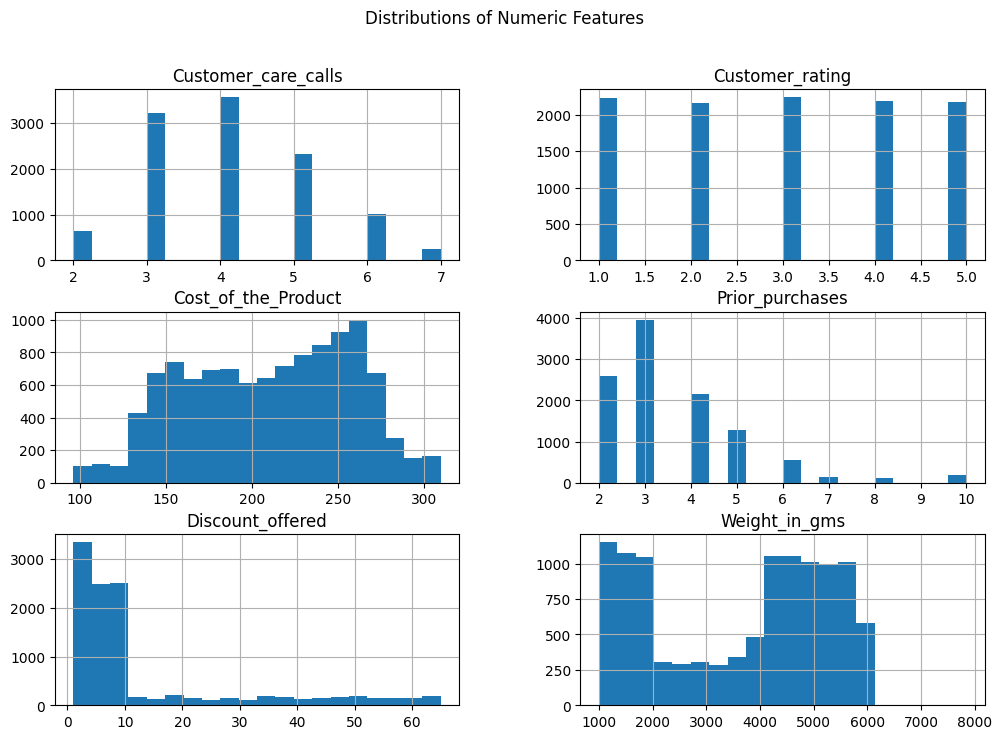

In [48]:
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

df[num_cols].hist(bins=20, figsize=(12, 8))
plt.suptitle("Distributions of Numeric Features")
plt.show()

# 2. Correlation Heatmap (Numerical Features)

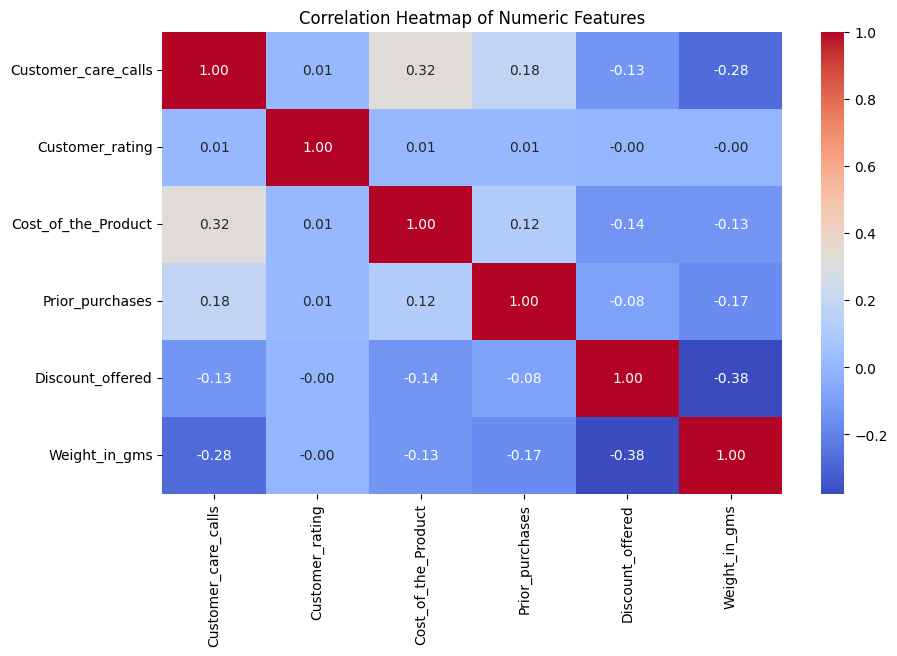

In [50]:
plt.figure(figsize=(10, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

A heatmap is a graphical representation that shows the relationship between variables using colors. In this project, it is used to visualize correlations among shipment attributes such as cost, weight, discounts, and customer care calls. It helps to quickly identify strong or weak relationships, remove redundant features, and focus on the most important factors for predicting on-time delivery.

# 3. Weight vs Cost (Boxplot per Shipment Mode)

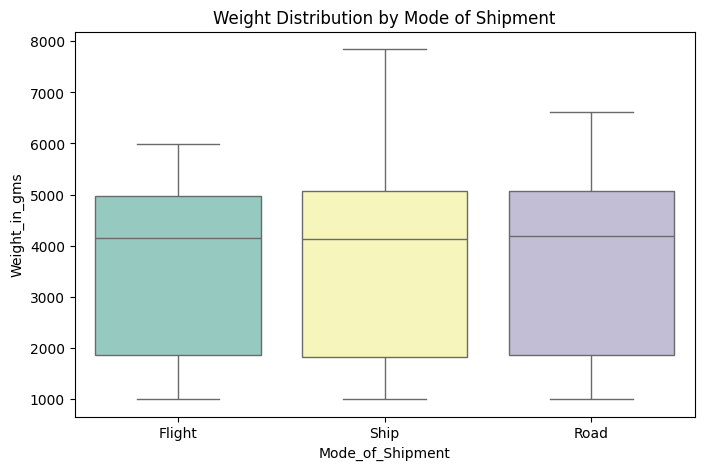

In [53]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Mode_of_Shipment", y="Weight_in_gms",
            hue="Mode_of_Shipment", palette="Set3", legend=False)

plt.title("Weight Distribution by Mode of Shipment")
plt.show()


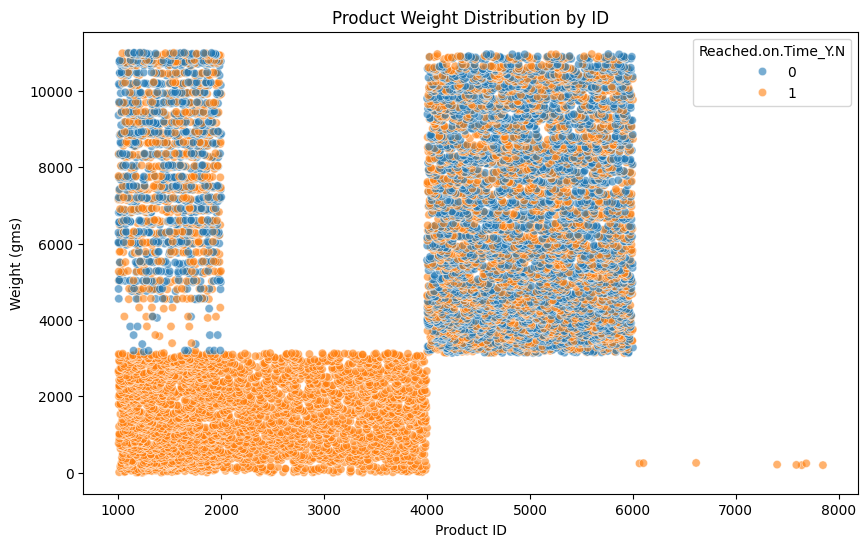

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Weight_in_gms", y="ID", alpha=0.6,hue="Reached.on.Time_Y.N")

plt.title("Product Weight Distribution by ID")
plt.xlabel("Product ID")
plt.ylabel("Weight (gms)")
plt.show()

From this we can able to see the the product weight which was between 0 to 2000 grams are delivered on time

# Visulization on the data based on the reach on time attribute

# 1. Countplot – On-time vs Not on-time

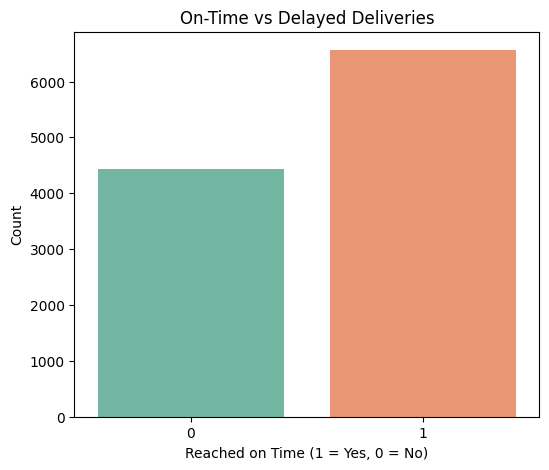

In [63]:
plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Reached.on.Time_Y.N", palette="Set2", legend=False)
plt.title("On-Time vs Delayed Deliveries")
plt.xlabel("Reached on Time (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


#2. Barplot – Average Cost vs On-time Delivery

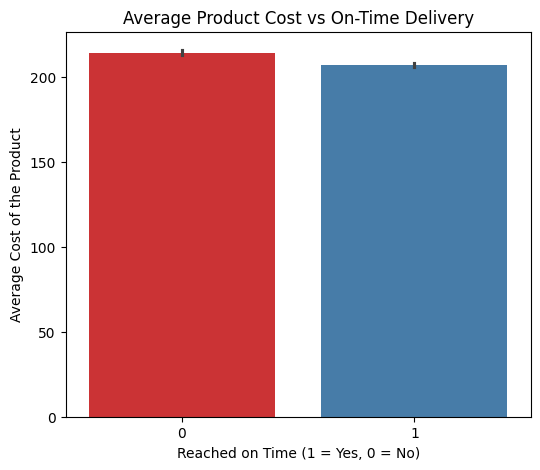

In [64]:
plt.figure(figsize=(6,5))
sns.barplot(
    data=df,
    x="Reached.on.Time_Y.N",
    y="Cost_of_the_Product",
    hue="Reached.on.Time_Y.N",
    palette="Set1",
    legend=False
)
plt.title("Average Product Cost vs On-Time Delivery")
plt.xlabel("Reached on Time (1 = Yes, 0 = No)")
plt.ylabel("Average Cost of the Product")
plt.show()


# 3. Boxplot – Weight vs On-time Delivery

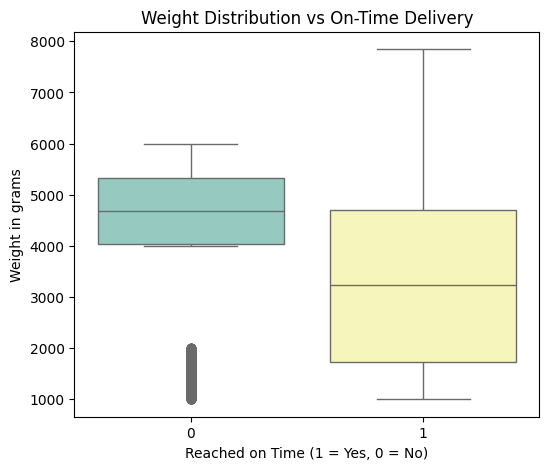

In [66]:
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df,
    x="Reached.on.Time_Y.N",
    y="Weight_in_gms",
    hue="Reached.on.Time_Y.N",
    palette="Set3",
    legend=False
)
plt.title("Weight Distribution vs On-Time Delivery")
plt.xlabel("Reached on Time (1 = Yes, 0 = No)")
plt.ylabel("Weight in grams")
plt.show()


from this we can able to see the productes which deliver on time and which may not accroding to the weight of the product

# 4. Heatmap – Correlation with On-time Delivery

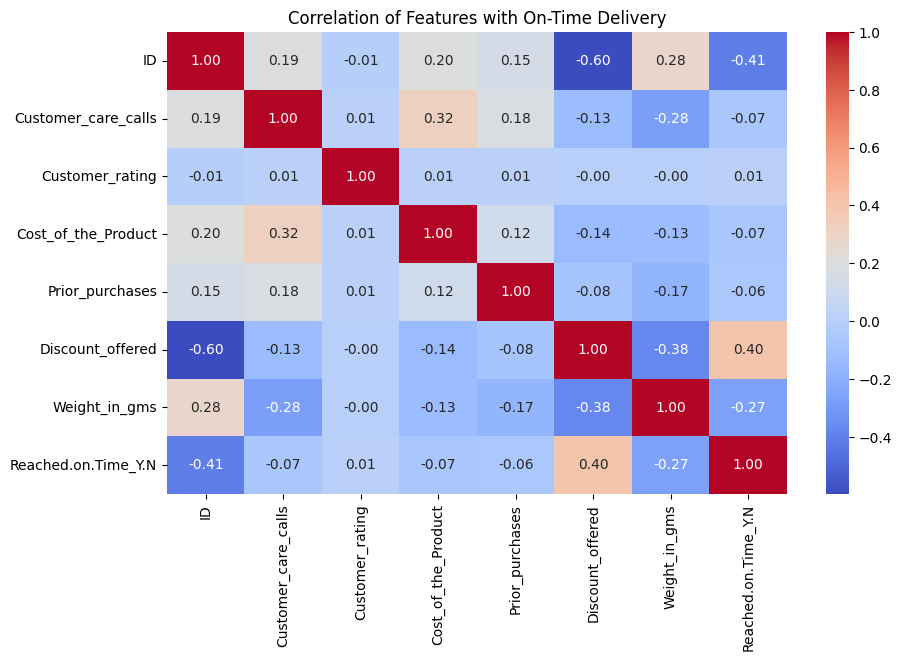

In [67]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Features with On-Time Delivery")
plt.show()


A heatmap is a visual tool used to show the strength of relationships between different numerical features in the dataset. In this project, the heatmap highlights how factors such as Weight, Cost of the Product, Customer Rating, Prior Purchases, and Discount Offered correlate with the target variable Reached.on.Time_Y.N (on-time delivery).
By analyzing the color intensity, we can quickly identify which features are strongly or weakly related to delivery performance. For example, higher product weight or larger discounts may show stronger associations with delays, while factors like customer rating may have little impact.
This helps in feature selection and model building, as we can prioritize the attributes that most influence on-time delivery for ShipmentSure: Predicting On-Time Delivery Using Supplier Data.